### 1. Import and data loading

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import time

In [2]:
df = pd.read_csv("../data/chess_games_feature.csv")
df.head()

,WhiteElo,BlackElo,ResultNumeric,EventTypeID,RatingDiff,AvgRating,WhiteIsHigherRated,WhiteRatingAdvantage,ECOID,white_castled,...,white_pawn_moves,black_pawn_moves,white_piece_moves,black_piece_moves,white_center_pawns,black_center_pawns,white_bishop_developed,black_bishop_developed,white_early_queen_out,black_early_queen_out
0,2504,2371,2,0,133,2437.5,1,133,0,1,...,5,5,4,4,2,2,1,1,0,0
1,2487,2596,1,0,109,2541.5,0,-109,0,1,...,4,6,5,3,2,1,1,1,0,0
2,2915,2921,1,0,6,2918.0,0,-6,0,1,...,4,5,5,4,2,1,1,1,0,0
3,2542,2433,2,0,109,2487.5,1,109,10,1,...,2,5,7,5,2,1,1,1,0,0
4,2473,2658,0,0,185,2565.5,0,-185,0,1,...,2,3,7,6,2,1,1,1,0,0


### 2. Prepare data

In [3]:
X = df.drop('ResultNumeric', axis=1)
y = df['ResultNumeric']

print(f"Features: {X.shape}")
print(f"Target: {y.shape}")

Features: (3243955, 22)
Target: (3243955,)


### 3. Train test split

In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2,        # 20% for testing
    random_state=42,
    stratify=y
)

#### Scale feature

In [5]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### 4. Train model

In [6]:
lr_model = LogisticRegression(
    max_iter=2000,
    solver='saga',
    random_state=42,
    n_jobs=-1,
)

In [7]:
start_time = time.time()

lr_model.fit(X_train_scaled, y_train)

training_time = time.time() - start_time
print(f"Training completed in {training_time:.2f} seconds ({training_time/60:.2f} minutes)")

Training completed in 37.00 seconds (0.62 minutes)


### 5. Evaluate

In [8]:
y_pred = lr_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f} ({accuracy*100:.2f}%)\n")

print("Classification Report: \n")
print(classification_report(y_test, y_pred, target_names=['Black Win', 'Draw', 'White Win']))

Accuracy: 0.5818 (58.18%)

Classification Report: 

              precision    recall  f1-score   support

   Black Win       0.56      0.56      0.56    265868
        Draw       0.77      0.28      0.41     83919
   White Win       0.58      0.69      0.63    299004

    accuracy                           0.58    648791
   macro avg       0.64      0.51      0.53    648791
weighted avg       0.60      0.58      0.57    648791



### 6. Confusion Matrix

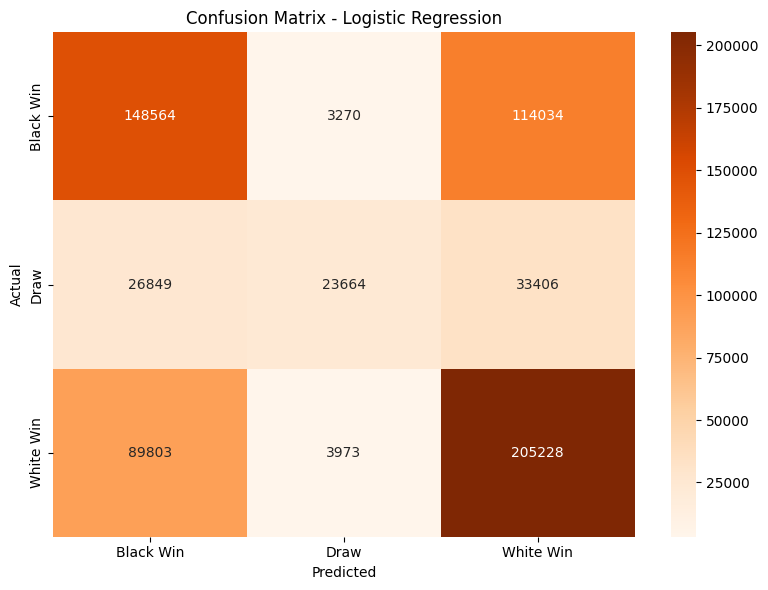

In [9]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges',
            xticklabels=['Black Win', 'Draw', 'White Win'],
            yticklabels=['Black Win', 'Draw', 'White Win'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix - Logistic Regression')
plt.tight_layout()
plt.show()

### 7. Coefficients (Feature importance for linear models)

                   Feature  Coefficient
6     WhiteRatingAdvantage     0.186056
1                 BlackElo     0.137855
0                 WhiteElo     0.133626
4                AvgRating     0.124179
2              EventTypeID     0.099604
3               RatingDiff     0.061677
11          black_captures     0.041937
10          white_captures     0.033054
16      white_center_pawns     0.026604
9            black_castled     0.023579
13        black_pawn_moves     0.018123
21   black_early_queen_out     0.014614
7                    ECOID     0.013689
8            white_castled     0.012399
20   white_early_queen_out     0.011536
5       WhiteIsHigherRated     0.010291
12        white_pawn_moves     0.008786
15       black_piece_moves     0.008307
17      black_center_pawns     0.008185
18  white_bishop_developed     0.004482
14       white_piece_moves     0.003833
19  black_bishop_developed     0.003545


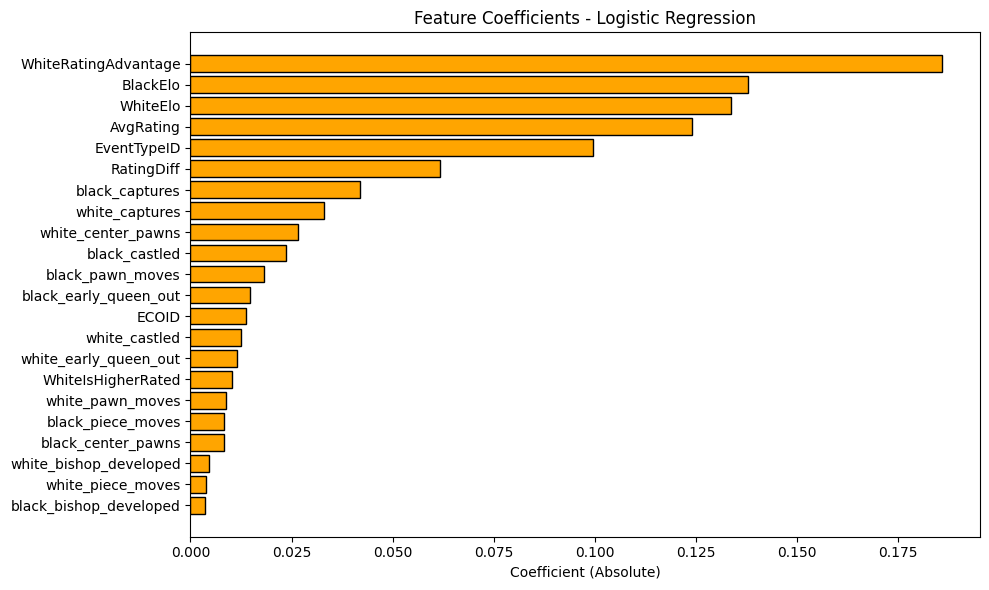

In [10]:
coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': np.abs(lr_model.coef_).mean(axis=0)  # Average across classes
}).sort_values('Coefficient', ascending=False)

print(coef_df)

plt.figure(figsize=(10, 6))
plt.barh(coef_df['Feature'], coef_df['Coefficient'], 
         color='orange', edgecolor='black')
plt.xlabel('Coefficient (Absolute)')
plt.title('Feature Coefficients - Logistic Regression')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()